# Neural Network 구축방법

In [35]:
import torch.nn as nn
import torch as torch
import torch.optim as optim

# 모듈 사용의 이해
torch.nn, torch.optim 등의 모듈을 사용하고 있다.  
-> '모듈'이므로, 특수 목적으로 사용하는 경우  
=> 어떤 목적인지, 어떤 값들을 모듈에서 불러올 수 있는지 생각해볼 수 있다.  
  
### torch.nn = for Forward-Propagation
### torch.optim = for Backward-Propagation

## torch.nn
NN을 구성하기 위한 모듈들 다수 포함

In [3]:
dir(nn)

['AdaptiveAvgPool1d',
 'AdaptiveAvgPool2d',
 'AdaptiveAvgPool3d',
 'AdaptiveLogSoftmaxWithLoss',
 'AdaptiveMaxPool1d',
 'AdaptiveMaxPool2d',
 'AdaptiveMaxPool3d',
 'AlphaDropout',
 'AvgPool1d',
 'AvgPool2d',
 'AvgPool3d',
 'BCELoss',
 'BCEWithLogitsLoss',
 'BatchNorm1d',
 'BatchNorm2d',
 'BatchNorm3d',
 'Bilinear',
 'CELU',
 'CTCLoss',
 'ChannelShuffle',
 'CircularPad1d',
 'CircularPad2d',
 'CircularPad3d',
 'ConstantPad1d',
 'ConstantPad2d',
 'ConstantPad3d',
 'Container',
 'Conv1d',
 'Conv2d',
 'Conv3d',
 'ConvTranspose1d',
 'ConvTranspose2d',
 'ConvTranspose3d',
 'CosineEmbeddingLoss',
 'CosineSimilarity',
 'CrossEntropyLoss',
 'CrossMapLRN2d',
 'DataParallel',
 'Dropout',
 'Dropout1d',
 'Dropout2d',
 'Dropout3d',
 'ELU',
 'Embedding',
 'EmbeddingBag',
 'FeatureAlphaDropout',
 'Flatten',
 'Fold',
 'FractionalMaxPool2d',
 'FractionalMaxPool3d',
 'GELU',
 'GLU',
 'GRU',
 'GRUCell',
 'GaussianNLLLoss',
 'GroupNorm',
 'Hardshrink',
 'Hardsigmoid',
 'Hardswish',
 'Hardtanh',
 'HingeEmbed

Linear(x->y) 노드 개수를 의미,  
x는 샘플수가 아니라 input 노드의 개수라는 점  
자동으로 모델을 생성해줌

### batch
연산은 디폴트가 batch  
-> parameter는 모든 sample의 평균으로 treat 된다.

In [19]:
x = torch.ones(10,1) #10samples, 1nodes

linear_model = nn.Linear(1,1)
linear_model(x)

tensor([[0.7356],
        [0.7356],
        [0.7356],
        [0.7356],
        [0.7356],
        [0.7356],
        [0.7356],
        [0.7356],
        [0.7356],
        [0.7356]], grad_fn=<AddmmBackward0>)

-> batch 처리된 결과 sample 별로 forwarding 한 결과는 언제나 같을 수 밖에...

## TENSOR.unsqueeze()
batch 처리가 default -> 입력값이 (#samples,1) 꼴이어야 한다.  
하지만 입력 자체를 받았을 때, (11) 꼴이므로 축을 하나 추가해야하는 상황  
squeeze의 반대 -> axis 한 개 추가

In [51]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0] 
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4] 
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

n_val = int(0.2*t_c.shape[0])
shuffled_index = torch.randperm(t_c.shape[0])

shuffled_u = t_u[shuffled_index]
shuffled_c = t_c[shuffled_index]
t_u_train = shuffled_u[:-n_val]
t_u_val = shuffled_u[-n_val:]
t_c_train = shuffled_c[:-n_val]
t_c_val = shuffled_c[-n_val:]


t_u.shape

torch.Size([11, 1])

In [33]:
linear_model(t_u)

tensor([[19.8780],
        [31.0213],
        [32.2901],
        [45.3643],
        [31.2420],
        [27.1598],
        [18.8850],
        [12.2100],
        [26.8839],
        [33.5038],
        [37.9170]], grad_fn=<AddmmBackward0>)

-> input 값이 달라서지 파라미터는 동일하게 적용된 상태임

## Optimizer in torch.nn(2모듈의 조합)

### torch.nn의 범위
nn.OOO() -> forward-propagation model 메소드를 의미 -> OOO.parameters() 등으로 접근  
기타 다른 torch 서비스에 접근하고 싶다? 기존에 알고 있는 torch.optim 등을 이용  

In [63]:
linear_model = nn.Linear(1,1)
optimizer = optim.SGD(
    params = linear_model.parameters(),
    lr = 1e-2
)

In [64]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.8033]], requires_grad=True),
 Parameter containing:
 tensor([-0.4286], requires_grad=True)]

### 기타 setup

In [69]:
# 이제는 model을 파라미터로 전달하는.
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1,n_epochs+1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        
        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"f" Validation loss {loss_val.item():.4f}")
        
def loss_fn(t_p, t_c):
    cost = (t_c-t_p)**2
    return cost.mean()

놓친 부분:  
Forward Propagation with Nodes를 설정하면?  
-> 당연히 params 차원 자동 설정, 자동 init  
-> optim.SGD(*model.parameters()*,  lr= ~) 사용

In [75]:
linear_model = nn.Linear(1,1)
optimizer = optim.SGD(linear_model.parameters(), lr = 1e-2)

t_un_train = t_u_train * 0.1
t_un_val = t_u_val * 0.1

training_loop(
    n_epochs = 3000,
    optimizer = optimizer, 
    model = linear_model, 
    loss_fn = loss_fn, 
    t_u_train = t_un_train, 
    t_u_val = t_un_val, 
    t_c_train = t_c_train, 
    t_c_val = t_c_val
)
linear_model

Epoch 1, Training loss 110.7468, Validation loss 8.5177
Epoch 1000, Training loss 3.0909, Validation loss 7.6520
Epoch 2000, Training loss 2.5255, Validation loss 5.9764
Epoch 3000, Training loss 2.5147, Validation loss 5.7626


Linear(in_features=1, out_features=1, bias=True)

## nn.MSELoss
mean square loss  
-> 결국 loss도 forward와 연관이 있다고 볼 수 있기에

In [77]:
linear_model = nn.Linear(1,1)
optimizer = optim.SGD(linear_model.parameters(), lr = 1e-2)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer, 
    model = linear_model, 
    loss_fn = nn.MSELoss(), 
    t_u_train = t_un_train, 
    t_u_val = t_un_val, 
    t_c_train = t_c_train, 
    t_c_val = t_c_val
)
linear_model

Epoch 1, Training loss 109.6206, Validation loss 9.2182
Epoch 1000, Training loss 3.0553, Validation loss 7.5869
Epoch 2000, Training loss 2.5248, Validation loss 5.9685
Epoch 3000, Training loss 2.5147, Validation loss 5.7616


Linear(in_features=1, out_features=1, bias=True)

# DNN(multi layers)

Sequential 한 조합으로 nn.Model 완성  
nn.OO는 block -> 더 큰 nn.XX를 완성하기 위해 사용가능  

In [81]:
seq_model = nn.Sequential(
    nn.Linear(1,13),
    nn.Tanh(),
    nn.Linear(13,1)
)
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

seq_model.name_parameters() 로 이름과 함께 파라미터를 받아와 볼 수 있다

In [85]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


### 문제점
모델을 정의할 때, 하드코딩으로 시퀀스를 정의해야하는 문제

In [ ]:
seq_model = nn.Sequential(
    nn.Linear(1,13),
    nn.Tanh(),
    nn.Linear(13,1)
)

### 해결
OrderedDict로 key-value로 전달

In [91]:
from collections import OrderedDict

sequence_detail = OrderedDict([
    ('hidden_linear', nn.Linear(1,8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8,1))
])

seq_model = nn.Sequential(
    sequence_detail
)
seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [94]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)
training_loop(
    n_epochs = 5000, 
    optimizer = optimizer, 
    model = seq_model, 
    loss_fn = nn.MSELoss(), 
    t_u_train = t_un_train, 
    t_u_val = t_un_val, 
    t_c_train = t_c_train, 
    t_c_val = t_c_val
)
print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 1.9654, Validation loss 2.3431
Epoch 1000, Training loss 1.9026, Validation loss 1.9674
Epoch 2000, Training loss 1.8979, Validation loss 2.0215
Epoch 3000, Training loss 1.8955, Validation loss 2.0413
Epoch 4000, Training loss 1.8938, Validation loss 2.0505
Epoch 5000, Training loss 1.8924, Validation loss 2.0508
output tensor([[8.2636],
        [8.0080]], grad_fn=<AddmmBackward0>)
answer tensor([[8.],
        [6.]])
hidden tensor([[ 0.0091],
        [-0.0011],
        [-0.0035],
        [-0.0031],
        [ 0.0089],
        [ 0.0058],
        [-0.0028],
        [ 0.0031]])


# Visualizing

plt.plot(X,Y) -> X array, Y array의 결과값  
torch.arange(20.,90.).unsqueeze() => 연속적인 입력값을 위해 range listup

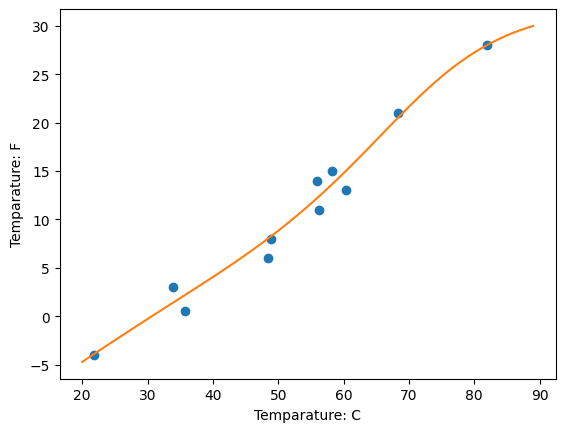

In [103]:
import matplotlib.pyplot as plt

t_range = torch.arange(20.,90.).unsqueeze(1)

plt.xlabel('Temparature: C')
plt.ylabel('Temparature: F')
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

# 임의 입력값은 model을 거쳐서 값 처리가 되어야함.
plt.plot(t_range.numpy(), seq_model(t_range * 0.1).detach().numpy())

# 키워드 정리

- nn.METHOD()
- plt only with numpy